In [1]:
import os
os.chdir('/Users/davidf./github_folder/COVID-19/')

In [2]:
import pandas as pd

In [3]:
# https://ourworldindata.org/covid-cases
df = pd.read_csv('owid-covid-data.csv')

## Change column types

In [4]:
# All integer columns are cast as float. Some will be changed to int
# Before that can be done, NaNs must be removed - in this case they will be changed to 0
cols_to_convert = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients', 
                   'weekly_icu_admissions', 'weekly_hosp_admissions', 'total_tests', 'new_tests', 
                   'total_vaccinations', 'people_vaccinated', 'total_boosters', 'new_vaccinations', 
                   'female_smokers', 'male_smokers', 'population', 'excess_mortality_cumulative_absolute', 
                   'excess_mortality_cumulative', 'excess_mortality']

# create a dictionary where keys are column names and values are 'int'
dtype_dict = {col: 'int' for col in cols_to_convert}

# handle NaN values and convert to int
for col in cols_to_convert:
    # check if column has any NaN values
    if df[col].isnull().sum() > 0:
        # here we are replacing NaN values with 0
        df[col].fillna(0, inplace=True)

# bulk change columns to integer after rounding
df[cols_to_convert] = df[cols_to_convert].round().astype(dtype_dict)

# Subsetting

The COVID pandemic was handled very differently by the neighboring countries Denmark and Sweden. 
But what were the effects?

https://nordics.info/show/artikel/the-nordic-countries-react-differently-to-the-covid-19-crisis

### First two new dataframes are made - one for the Danish COVID data and one for the Swedish

In [5]:
df_den = df[df['iso_code'] == 'DNK'].copy()
df_swe = df[df['iso_code'] == 'SWE'].copy()

Lets have a look at the dataframes

First, lets compare the number of new cases in each country

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator

def plot_cases(df1, df2, country1='Country1', country2='Country2', 
               y_column='new_cases_smoothed_per_million', 
               title='Number of new cases per million, smoothed', 
               major_y_ticks=500, minor_y_ticks=100):
    
    # Convert 'date' column to datetime format
    df1['date'] = pd.to_datetime(df1['date'])
    df2['date'] = pd.to_datetime(df2['date'])

    # Setting the size 
    plt.figure(figsize=(12, 8))

    # Plotting the first line chart in red
    plt.plot(df1['date'], df1[y_column], color='red', label=country1, alpha=0.5)

    # Plot overlaying data in blue
    plt.plot(df2['date'], df2[y_column], color='blue', label=country2, alpha=0.5)

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel(title)
    plt.title(title)

    # Set x-axis ticks to one for every three months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Set x-axis minor ticks to one per month
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

    # Adjust size of y-tick labels
    plt.tick_params(axis='y', labelsize=10)

    # Add thousand separators to y-axis ticks
    formatter = mticker.FuncFormatter(lambda x, _: format(int(x), ','))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Set y-axis major ticks
    plt.gca().yaxis.set_major_locator(MultipleLocator(major_y_ticks))

    # Set y-axis minor ticks without labels
    plt.gca().yaxis.set_minor_locator(MultipleLocator(minor_y_ticks))

    # Rotate x-axis tick labels
    plt.xticks(rotation=70)

    # Add legend
    plt.legend()

    # Grid for major ticks
    plt.grid(True, which='major', linewidth=0.2)

    plt.show()

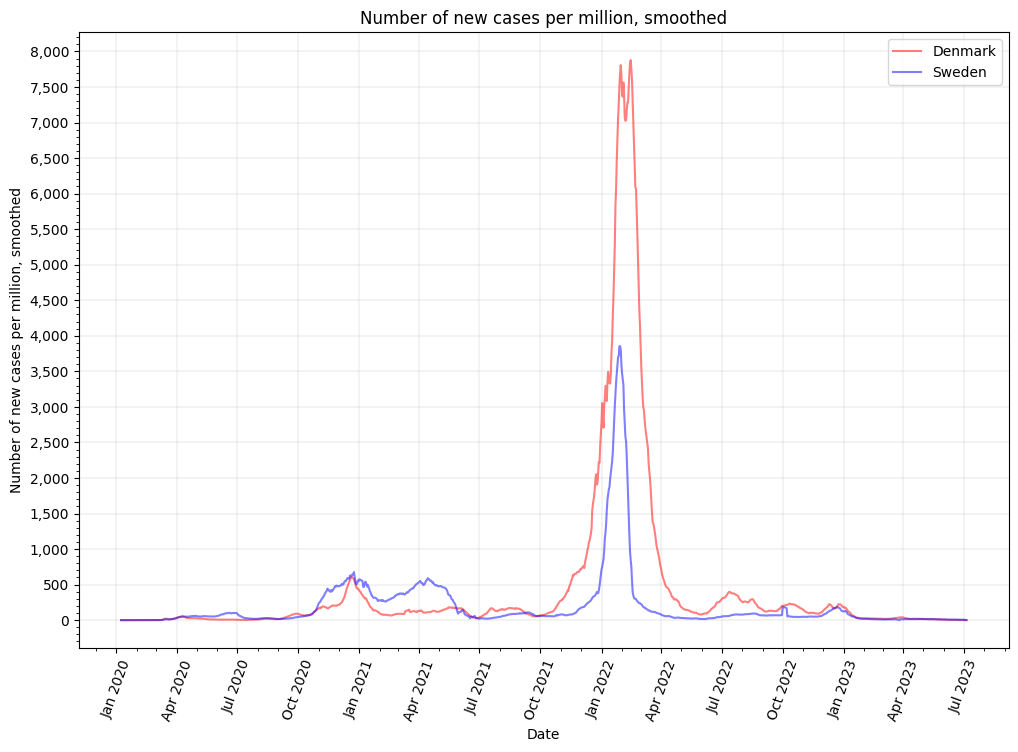

In [7]:
plot_cases(df_den, df_swe, 'Denmark', 'Sweden', 'new_cases_smoothed_per_million',
           'Number of new cases per million, smoothed', 500, 100)

Throughout the period extending from October 2020 to June 2021, a higher incidence of daily cases was observed in Sweden as compared to Denmark, albeit the disparity did not exceed a range of 300 to 400 cases. Conversely, a marked increase in cases was noted in Denmark relative to Sweden from November 2021 through to April 2022, wherein Sweden's peak stood at approximately 3,800 cases while Denmark registered two instances of reaching around 7,400 cases. 

This pattern seemingly points towards the wisdom of Sweden's strategy, which was characterized by the implementation of minimal restrictions. To get a clearer understanding of these trends, let us dive further into the data and instead look at the number of tests being performed.

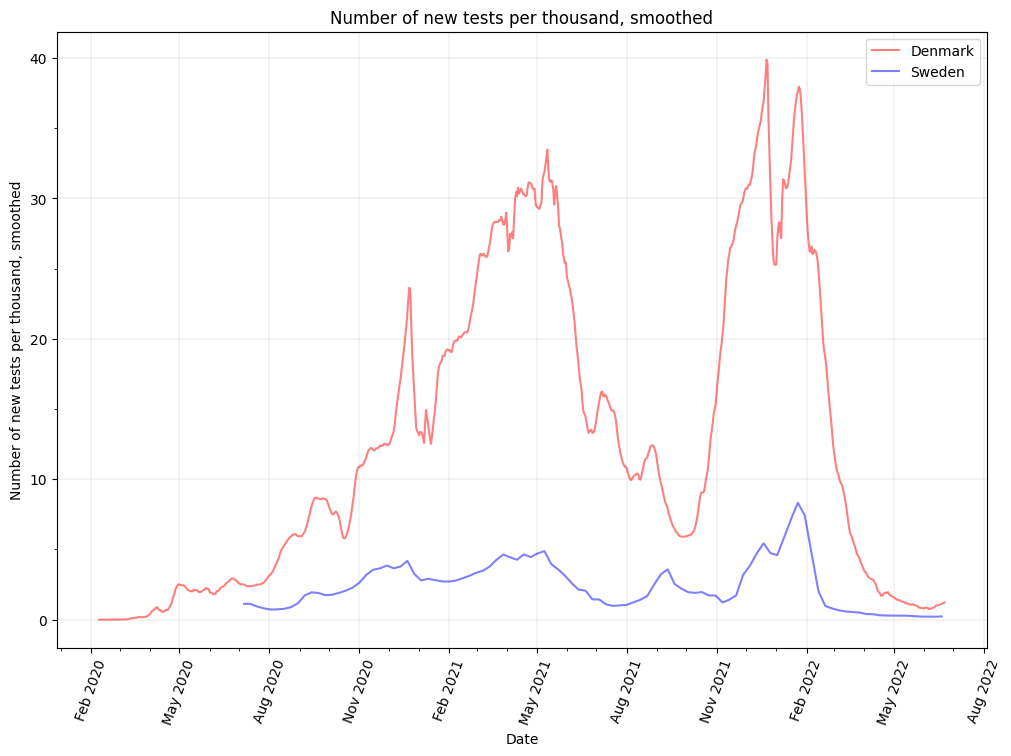

In [8]:
plot_cases(df_den, df_swe, 'Denmark', 'Sweden', 'new_tests_smoothed_per_thousand',
           'Number of new tests per thousand, smoothed', 10, 5)

This graph warrants significant consideration as it illustrates that testing rates in Denmark notably exceed those in Sweden. Consequently, a higher detection rate of infections should be anticipated within the Danish population, a trend that is reflected in the former plot. Luckily, there is a metric called the "tests per case", which shows us the number of tests per positive case. 

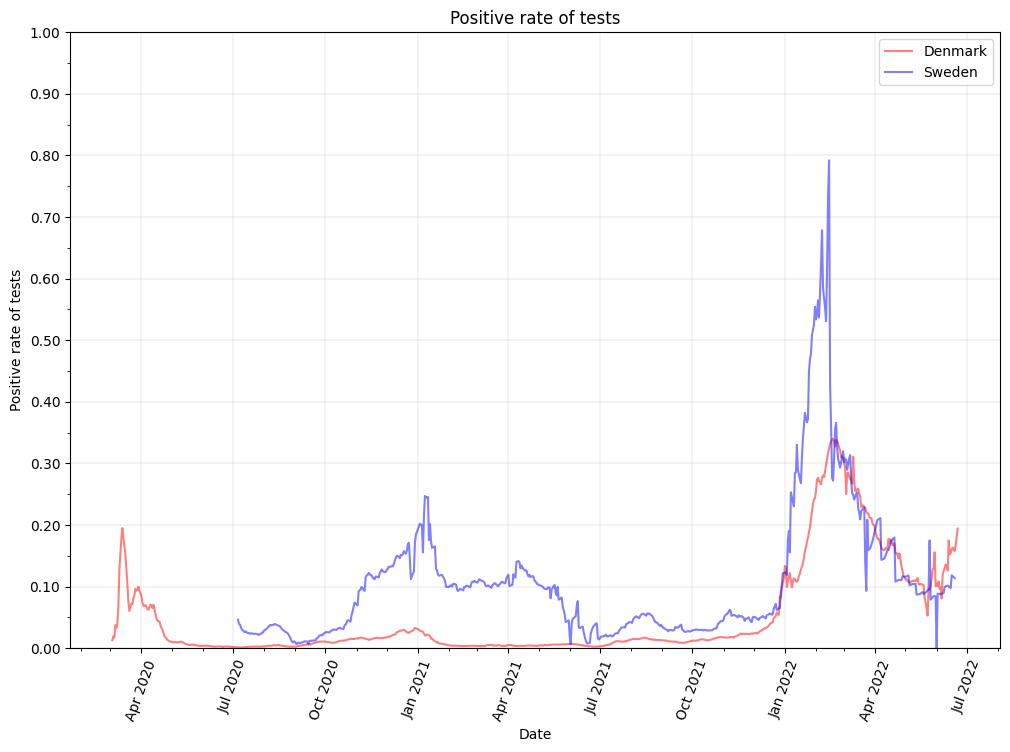

In [9]:
# Convert date column to datetime format
df_den['date'] = pd.to_datetime(df_den['date'])
df_swe['date'] = pd.to_datetime(df_swe['date'])

# Set figsize
plt.figure(figsize=(12, 8))

# Plot first line in red
plt.plot(df_den['date'], df_den['positive_rate'], color='red', label='Denmark', alpha=0.5)

# Plot second line in blue
plt.plot(df_swe['date'], df_swe['positive_rate'], color='blue', label='Sweden', alpha=0.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Positive rate of tests')
plt.title('Positive rate of tests')

# Set x-axis ticker to one every quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set x-axis minor ticks to once per month
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Adjust the size of y-tick labels
plt.tick_params(axis='y', labelsize=10)

# Add thousand separators to y-axis tick labels
formatter = mticker.FuncFormatter(lambda x, _: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Set y-axis limit
plt.ylim(0, 1)

# Set y-axis major ticks to one per .1
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

# Set y-axis minor ticks to one per .05
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))

# Rotate x-axis tick labels
plt.xticks(rotation=70)

# Add legend
plt.legend()

# Grid for major ticks
plt.grid(True, which='major', linewidth=0.2)

plt.show()

This graph is particularly enlightening. It depicts that Sweden initiated its testing protocol approximately half a year later than Denmark. Moreover, it highlights the predominance of a higher positivity rate in Sweden relative to Denmark throughout the observed period. In the first quarter of 2022, Sweden's positivity rate escalates alarmingly, nearing a remarkable 80%. This significant rate might imply that testing predominantly took place in instances where a positive outcome was already strongly suspected.

Nevertheless, it's crucial to underscore that a high positivity rate could also be indicative of inadequate testing capacity or strategic targeted testing, implying that only individuals with pronounced symptoms or those deemed high risk were tested.

Let's look at the number of weekly hospitalizations per million.

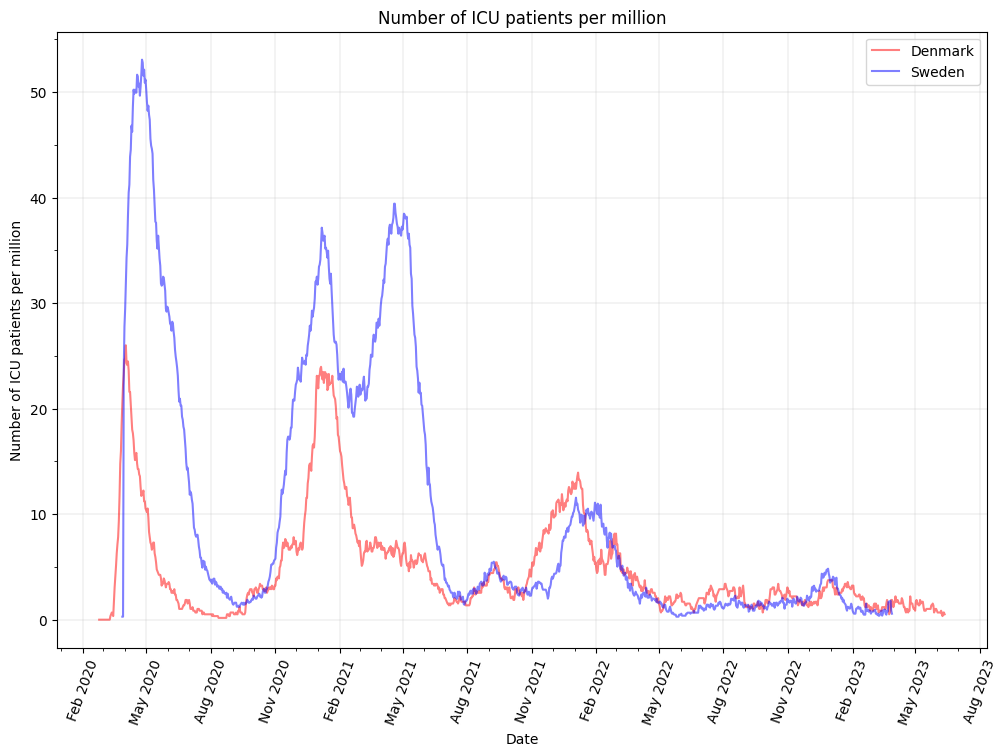

In [10]:
plot_cases(df_den, df_swe, 'Denmark', 'Sweden', 'icu_patients_per_million',
           'Number of ICU patients per million', 10, 5)

The chart distinctly demonstrates a larger ICU patient population in Sweden as compared to Denmark, marked by an additional surge in May 2021. Encouragingly, both nations show a reduction to fewer than five ICU patients beyond May 2022.

Nevertheless, it is important to be aware of potential differences in how different countries quantify their ICU patient numbers. Certain nations might augment their counts with patients who, while testing positive for the virus, have been admitted to the ICU due to unrelated health concerns. To get a better feel for the differences, lets finally look at (cumulative) number of excess deaths per million.

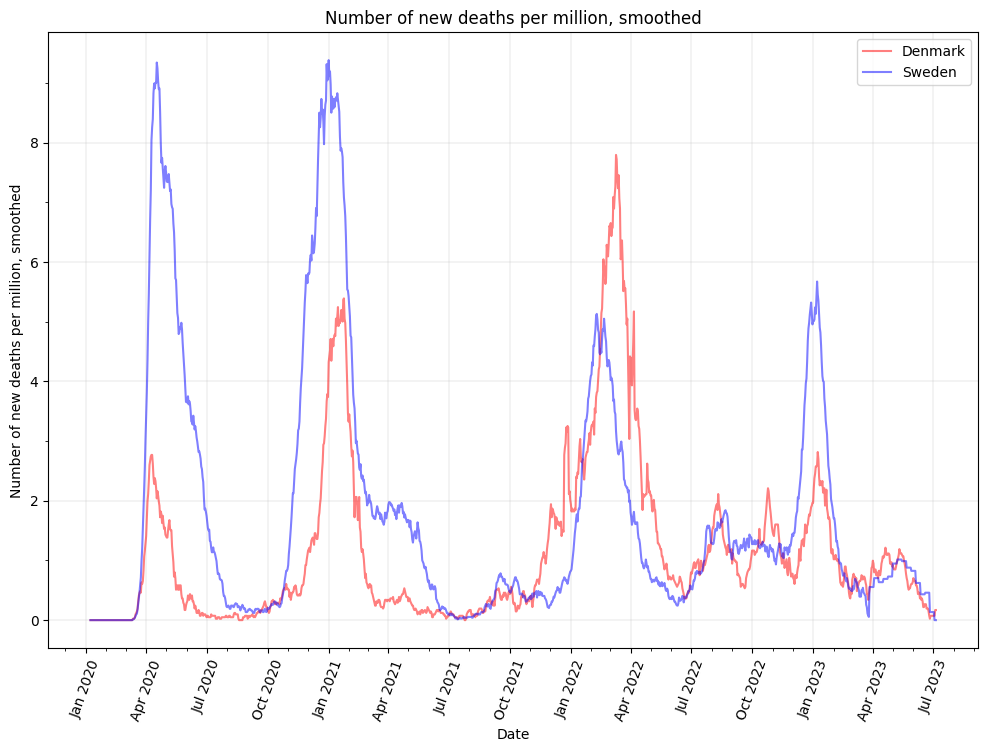

In [11]:
plot_cases(df_den, df_swe, 'Denmark', 'Sweden', 'new_deaths_smoothed_per_million',
           'Number of new deaths per million, smoothed', 2, 1)

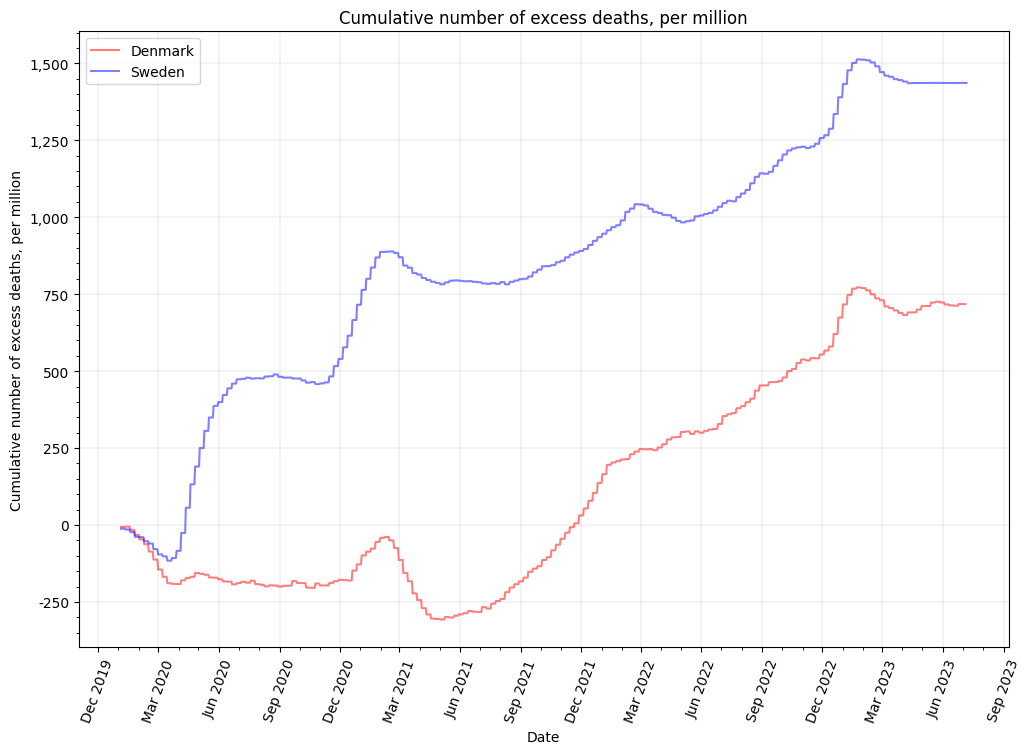

In [12]:
# There is only data on Sundays and the rest are NaNs. In order to deal with them, the feed forward method is used
df_den['excess_mortality_cumulative_per_million'].fillna(method='ffill', inplace=True)
df_swe['excess_mortality_cumulative_per_million'].fillna(method='ffill', inplace=True)

plot_cases(df_den, df_swe, 'Denmark', 'Sweden', 'excess_mortality_cumulative_per_million',
           'Cumulative number of excess deaths, per million', 250, 50)

# Danish preventative measures

According to Wikipedia, there were 

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Denmark#Testing,_treatment_and_preventive_measures




March 16: Lockdown comes into force following a March 11 speech by Mette Frederiksen, Prime Minister and Leader of the Social Democrat government, which announced the implementation of restrictive measures. Schools, administrative establishments and public places (non-essential stores, places of worship, cinemas, theaters, performance venues, etc.) are closed. Outings are not under any restrictions. 

https://www.institutmontaigne.org/en/expressions/europe-versus-coronavirus-putting-danish-model-test


Strict measures
https://www.theguardian.com/world/2021/dec/14/denmark-norway-rush-in-stricter-covid-measures-as-cases-soar


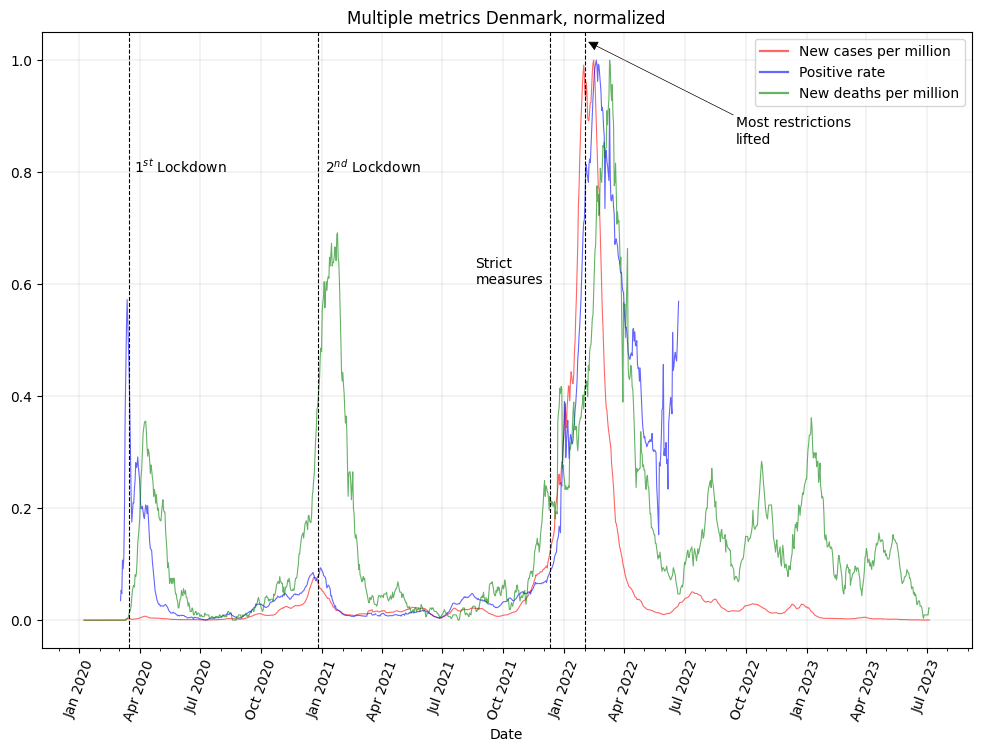

In [17]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import FancyArrowPatch

# Convert 'date' column to datetime format
df_den['date'] = pd.to_datetime(df_den['date'])

# Set the size 
plt.figure(figsize=(12, 8))

# Data has different scales, so initiate scaler for scaling data
scaler = MinMaxScaler()

# Scale data
df_den[['new_cases_smoothed_per_million', 'positive_rate', 'new_deaths_smoothed_per_million']] = scaler.fit_transform(df_den[['new_cases_smoothed_per_million', 'positive_rate', 'new_deaths_smoothed_per_million']])

# Plot the first column
plt.plot(df_den['date'], df_den['new_cases_smoothed_per_million'], color='red', label='New cases per million', 
         alpha=0.6, linewidth=.8)

# Plot the second column
plt.plot(df_den['date'], df_den['positive_rate'], color='blue', label='Positive rate', 
         alpha=0.6, linewidth=.8)

# Plot the third column
plt.plot(df_den['date'], df_den['new_deaths_smoothed_per_million'], color='green', label='New deaths per million', 
         alpha=0.6, linewidth=.8)


# Add lines to mark lockdowns
plt.axvline(pd.to_datetime('2020-3-16'), color='black', linestyle='--', linewidth=.8)
plt.axvline(pd.to_datetime('2020-12-25'), color='black', linestyle='--', linewidth=.8)
plt.axvline(pd.to_datetime('2021-12-10'), color='black', linestyle='--', linewidth=.8)
plt.axvline(pd.to_datetime('2022-2-1'), color='black', linestyle='--', linewidth=.8)

# Add text to lines
plt.text(pd.to_datetime('2020-3-24'), .8, '$1^{st}$ Lockdown')
plt.text(pd.to_datetime('2021-1-5'), .8, '$2^{nd}$ Lockdown')
plt.text(pd.to_datetime('2021-8-20'), .6, 'Strict\nmeasures')

# Configure arrow
arrow_x = pd.to_datetime('2022-2-2') 
arrow_y = 1.035 # the y location of arrow
arrow_text_x = pd.to_datetime('2022-10-01') - pd.Timedelta(days=15) # text start location
arrow_text_y = 0.9 # arrow start location

# Add arrow
arrow = FancyArrowPatch((arrow_text_x, arrow_text_y), 
                        (arrow_x, arrow_y), 
                        arrowstyle='-|>',
                        mutation_scale=15, # Size of arrow head
                        color='black',
                        lw=.5) # Line width

# Set labels and title
plt.xlabel('Date')
plt.title('Multiple metrics Denmark, normalized')

# Set x-axis ticker to one per quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set x-axis minor ticks to one per month
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Adjust the size of y-tick labels
plt.tick_params(axis='y', labelsize=10)

# Rotate x-axis labels
plt.xticks(rotation=70)

# Add legend
legend = plt.legend()

# Change line thickness in legend
for line in legend.get_lines():
    line.set_linewidth(1.6)

# Grid
plt.grid(linewidth=0.2)

# Add arrow and text
ax = plt.gca()
ax.add_patch(arrow)
plt.text(arrow_text_x, arrow_text_y, 'Most restrictions\nlifted', va='top')

plt.savefig('matplotlib_plot.png')

plt.show()

# Denmark's response

Denmark's pandemic timeline includes two instances of lockdown and one episode of tightened restrictions. The dual lockdowns appear to have been successful, initiated at points where case numbers began to rise. Naturally, a short-term continuance in this upward trend followed before a subsequent reduction was observed. In contrast, the strict measures implemented in December 2021 did not demonstrate clear effects before most of the restrictions were eased on February 1st, 2022. Furthermore, minor increases in cases during the summer and autumn of 2022 corresponded with rather significant upswings in death rates, a correlation.